In [1]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.covariance import EmpiricalCovariance
import matplotlib.pyplot as plt

In [2]:
data=load_wine()
X=data.data
Y=data.target
df=pd.DataFrame(data.data,columns=data.feature_names)
df['class'] = data.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.3, random_state=42)

data_standard=StandardScaler()
X_train_scaled = data_standard.fit_transform(X_train)
X_test_scaled = data_standard.transform(X_test)

nn = KNeighborsClassifier(n_neighbors=3)
n_3=nn.fit(X_train_scaled, y_train)



In [4]:
y_pred_nn = nn.predict(X_test_scaled)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("accuracy:",accuracy_nn)

accuracy: 0.9629629629629629


step 2

In [5]:
pca=PCA(n_components=2)

X_pca_train = pca.fit_transform(X_train_scaled)
X_pca_test = pca.transform(X_test_scaled)

explained_variance = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variance)

print("result:",cumulative_variance)

nn_pca = KNeighborsClassifier(n_neighbors=3)
nn_pca.fit(X_pca_train, y_train)
y_pred_pca = nn_pca.predict(X_pca_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("KNN with PCA (2D) accuracy:", accuracy_pca)


result: [0.36196226 0.54960087]
KNN with PCA (2D) accuracy: 0.9814814814814815


step 3

In [6]:
def rule_based_wine_classifier(sample):
    alcohol = sample[0]
    
    if alcohol < 12:
        return 0
    elif 12 <= alcohol <= 13:
        return 1
    else:  # alcohol > 13
        return 2
# classify all samples
rule_predictions = np.array([rule_based_wine_classifier(x) for x in X_test])

In [7]:
acc = accuracy_score(y_test, rule_predictions)
print("Rule-Based System Accuracy:", acc)

Rule-Based System Accuracy: 0.48148148148148145


In [8]:
# KNN بدون PCA
nn = KNeighborsClassifier(n_neighbors=3)
n_3 = nn.fit(X_train_scaled, y_train)
y_pred_nn = nn.predict(X_test_scaled)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("KNN accuracy:", accuracy_nn)

# KNN با PCA
nn_pca = KNeighborsClassifier(n_neighbors=3)
nn_pca.fit(X_pca_train, y_train)
y_pred_pca = nn_pca.predict(X_pca_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("KNN with PCA (2D) accuracy:", accuracy_pca)

# Rule-Based
rule_predictions = np.array([rule_based_wine_classifier(x) for x in X_test])
acc = accuracy_score(y_test, rule_predictions)
print("Rule-Based System Accuracy:", acc)


KNN accuracy: 0.9629629629629629
KNN with PCA (2D) accuracy: 0.9814814814814815
Rule-Based System Accuracy: 0.48148148148148145


step4

In [9]:
eco = EmpiricalCovariance().fit(X_train_scaled)
inv_cov = np.linalg.inv(eco.covariance_)

metrics = {
    "euclidean": KNeighborsClassifier(n_neighbors=3, metric="euclidean"),
    "manhattan": KNeighborsClassifier(n_neighbors=3, metric="manhattan"),
    "cosine": KNeighborsClassifier(n_neighbors=3, metric="cosine"),
    "chebyshev": KNeighborsClassifier(n_neighbors=3, metric="chebyshev"),
    "mahalanobis": KNeighborsClassifier(
        n_neighbors=3,
        metric="mahalanobis",
        metric_params={"VI": inv_cov},
    ),
}

results = {}

for name, clf in metrics.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

print("Test accuracies:")
for m, acc in results.items():
    print(f"{m}: {acc:.4f}")


acc_pca_euclidean = results["euclidean"]

# print("\nComparison:")
# print(f"Original KNN (scaled 13D) accuracy: {accuracy_nn:.4f}")
# print(f"KNN with PCA (2D, euclidean) accuracy: {acc_pca_euclidean:.4f}")    

Test accuracies:
euclidean: 0.9630
manhattan: 0.9630
cosine: 0.9815
chebyshev: 0.9444
mahalanobis: 0.9074


In [10]:
def plot_decision_boundary_simple(model, X_pca, y, title):
    x_min, x_max = X_pca[:,0].min()-1, X_pca[:,0].max()+1
    y_min, y_max = X_pca[:,1].min()-1, X_pca[:,1].max()+1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(pca.inverse_transform(grid))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
    plt.title(title)
    plt.show()





In [11]:
new_dict = dict()


for metric in ['euclidean', 'manhattan', 'cosine', 'chebyshev', 'mahalanobis']:
    print(f"metric = {metric}")
    if metric == 'mahalanobis':
        cov = np.cov(X_train_scaled, rowvar=False)
        VI = np.linalg.inv(cov)
        clf = KNeighborsClassifier(n_neighbors=3, metric=metric, metric_params={'V': cov, 'VI': VI})
    else:
        clf = KNeighborsClassifier(n_neighbors=3, metric=metric)
    new_dict[metric] = clf

    clf.fit(X_train_scaled, y_train)
    new_dict[metric] = clf
    train_score = clf.score(X_train_scaled, y_train)
    test_score = clf.score(X_test_scaled, y_test)
    print("Train Accuracy:", train_score)
    print("Test Accuracy:", test_score)
    print("#" * 10)
    print()

metric = euclidean
Train Accuracy: 0.9516129032258065
Test Accuracy: 0.9629629629629629
##########

metric = manhattan
Train Accuracy: 0.9919354838709677
Test Accuracy: 0.9629629629629629
##########

metric = cosine
Train Accuracy: 0.9435483870967742
Test Accuracy: 0.9814814814814815
##########

metric = chebyshev
Train Accuracy: 0.9596774193548387
Test Accuracy: 0.9444444444444444
##########

metric = mahalanobis
Train Accuracy: 0.967741935483871
Test Accuracy: 0.9074074074074074
##########



In [12]:
X_full_scaled = data_standard.transform(X)

X_pca_full = pca.transform(X_full_scaled)


In [13]:

for name, model in new_dict.items():
    plot_decision_boundary(model, X_pca_train, y_train,
                           f"KNN Decision Boundary – {name.upper()}",
                           pca, data_standard)

NameError: name 'plot_decision_boundary' is not defined

step 5

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
import numpy as np

y_train_2d = y_train.reshape(-1, 1)
y_test_2d = y_test.reshape(-1, 1)

tf = FunctionTransformer(lambda x: x / 2.0)

y_train_reg = tf.fit_transform(y_train_2d)  
y_test_reg = tf.transform(y_test_2d) 

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train_reg)

y_pred = lin_reg.predict(X_test_scaled)
print(y_pred[:10])



[[0.0770902 ]
 [0.13966255]
 [0.75613121]
 [0.11534642]
 [0.4565003 ]
 [0.06517564]
 [0.47093766]
 [0.97409792]
 [0.24847341]
 [0.70600555]]


In [ ]:

from sklearn.metrics import accuracy_score

levels = np.array([0.0, 0.5, 1.0])

def decode_soft_preds(y_cont):
    y_cont = np.asarray(y_cont).ravel()

    idx = np.argmin(np.abs(y_cont[:, None] - levels), axis=1)

    return idx


In [ ]:

y_pred_cont = lin_reg.predict(X_test_scaled)


y_pred_class = decode_soft_preds(y_pred_cont)


acc_reg = accuracy_score(y_test, y_pred_class)
print("Linear Regression accuracy:", acc_reg)


Linear Regression accuracy: 0.9444444444444444


In [ ]:

X_full_scaled = data_standard.transform(X)


X_pca_full = pca.transform(X_full_scaled)


In [ ]:


def plot_decision_boundary_reg(model, X_pca_full, y, title, pca):

    x_min, x_max = X_pca_full[:, 0].min() - 1, X_pca_full[:, 0].max() + 1
    y_min, y_max = X_pca_full[:, 1].min() - 1, X_pca_full[:, 1].max() + 1

 
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]

    grid_scaled = pca.inverse_transform(grid)

    y_cont = model.predict(grid_scaled)

   
    y_grid = decode_soft_preds(y_cont)

    Z = y_grid.reshape(xx.shape)

    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")

  
    plt.scatter(
        X_pca_full[:, 0],
        X_pca_full[:, 1],
        c=y,
        cmap="viridis",
        edgecolors="k"
    )

    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()


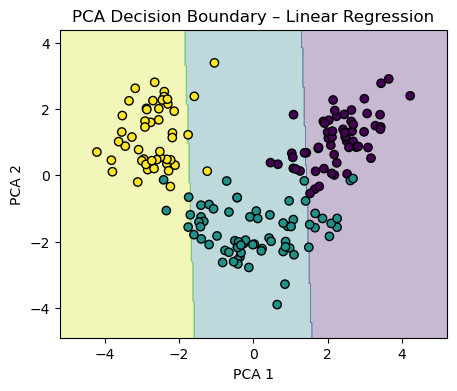

In [ ]:
plot_decision_boundary_reg(
    lin_reg,
    X_pca_full,
    Y,
    "PCA Decision Boundary – Linear Regression",
    pca
)
